# Семинар 5: визуализация

На этом семинаре мы поговорим про то, как в python можно делать разные графики и визуализации.

# 1. Строим картинку в matplotlib

In [1]:
%matplotlib inline

`matplotlib inline` - позволяет рисовать графики прямо в ноутбуке

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# зададим параметры рисуемых нами графиков, например, размер
plt.rcParams['figure.figsize'] = (16, 8)

Простейший график: две линии на плоскости

In [4]:
import math

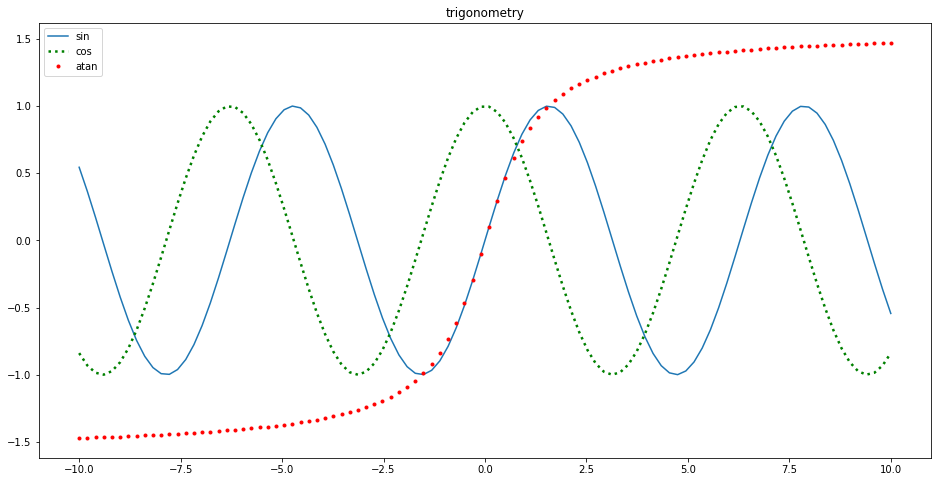

In [5]:
X = np.linspace(-10, 10, 100)
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = [math.atan(x) for x in X]

plt.title('trigonometry') #заголовок графика
plt.plot(X, Y1) #первая линия на графике
plt.plot(X, Y2, linewidth=2.5, linestyle=":", color="green")
plt.plot(X, Y3, marker=".", linestyle = '',color="red")
plt.legend(["sin", "cos", "atan"])
plt.show()

Нарисуйте черным график куба и желтым график экспоненты на отрезке $[-e; e]$

In [6]:
# ваш код

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

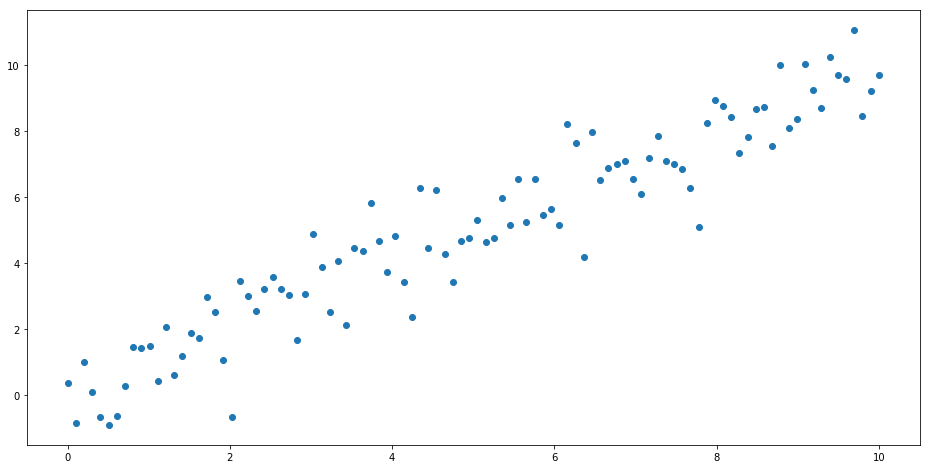

In [7]:
X = np.linspace(0, 10, 100)
Y = X + np.random.normal(size = 100)
plt.scatter(X, Y)

(0, 10)

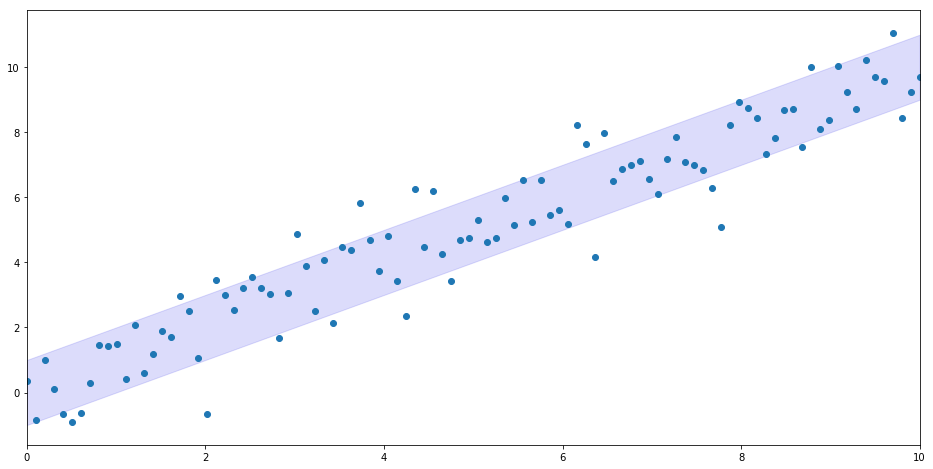

In [8]:
plt.fill_between(X, X-1, X+1, color = [(.1,.1,.9)], alpha = .15)
plt.scatter(X, Y)
plt.xlim((0,10))

А теперь попробуем потыкать в настоящие данные.

## 2. Настоящие данные

In [1]:
import pandas as pd

youtube = pd.read_csv("youtube_data.csv", sep = "\t")
print(youtube.shape)
youtube.head()

(19124, 30)


,title,caption,categoryId,commentCount,definition,description,dislikeCount,duration,license,licensedContent,...,comment_mean_len_symbol,comment_mean_len_word,comment_negative_mean_prob,comment_negative_share,commentators_uniq,comments_emoji_max,comments_emoji_mean,comments_emoji_share,comments_obscene_cnt,words_obscene_cnt
0,"""#2Маши ""Свободные линии""",False,10,34.0,hd,ITUNES - https://itun.es/ru/0YzI_,43.0,PT3M30S,youtube,True,...,59.440000,8.840000,0.635410,0.480000,24.0,9.0,1.000000,0.320000,0.0,0.0
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",False,10,NaN,sd,NEW OFFICIAL VIDEO\r\n2010,690.0,PT3M42S,youtube,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",False,10,26.0,sd,Посвящается Майклу Джексону...\r\nCover-versio...,10.0,PT5M46S,youtube,False,...,120.000000,19.291667,0.725987,0.750000,23.0,13.0,0.666667,0.125000,0.0,0.0
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",False,10,12.0,sd,"Сергей Лазарев, La Toya Jackson, Ани Лорак, Т...",7.0,PT6M16S,youtube,False,...,81.818182,11.545455,0.736776,0.727273,11.0,13.0,1.181818,0.090909,0.0,0.0
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",False,10,46.0,sd,official video,19.0,PT3M,youtube,True,...,43.735294,8.617647,0.596008,0.441176,33.0,23.0,0.794118,0.088235,1.0,1.0


In [2]:
youtube.dtypes

title                          object
caption                          bool
categoryId                      int64
commentCount                  float64
definition                     object
description                    object
dislikeCount                  float64
duration                       object
license                        object
licensedContent                  bool
likeCount                     float64
music_style                    object
performer                      object
publicStatsViewable              bool
publishedAt                    object
tags                           object
video_id                       object
viewCount                     float64
comment_max_len_symbol        float64
comment_max_len_word          float64
comment_mean_len_symbol       float64
comment_mean_len_word         float64
comment_negative_mean_prob    float64
comment_negative_share        float64
commentators_uniq             float64
comments_emoji_max            float64
comments_emo

Добавим несколько столбцов, которые будут отражать _возраст видео_ в более удобной форме

In [3]:
from datetime import datetime

In [4]:
x = youtube.publishedAt.iloc[0]
x

'2016-01-28T09:04:40.000Z'

In [5]:
y = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ")
y

datetime.datetime(2016, 1, 28, 9, 4, 40)

In [6]:
y.timestamp()

1453961080.0

In [7]:
def get_ts(timestamp_iso8601):
    timestamp = datetime.strptime(timestamp_iso8601, "%Y-%m-%dT%H:%M:%S.%fZ")
    return timestamp.timestamp()

def get_age(published_at, now = "2019-03-15T00:00:00.000Z"):
    age = datetime.strptime(now, "%Y-%m-%dT%H:%M:%S.%fZ") -  datetime.strptime(published_at, "%Y-%m-%dT%H:%M:%S.%fZ")
    return int(age.total_seconds() / 86400)

In [8]:
youtube['publishedAt_ts'] = youtube.publishedAt.map(get_ts)
youtube['video_age'] = youtube.publishedAt.map(get_age)

## 2.1 Гистограммы 

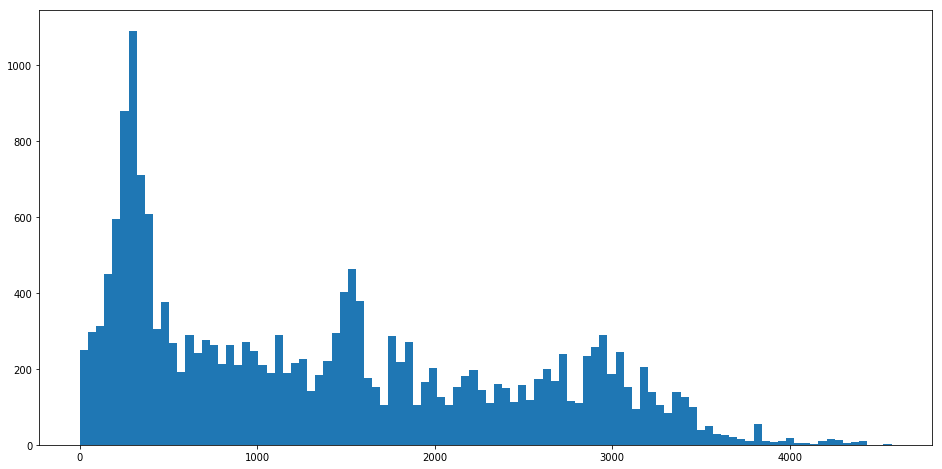

In [12]:
plt.hist(youtube['video_age'], bins=100)
plt.show()

In [25]:
youtube[youtube.video_age >= youtube.video_age.max() - 100]

,title,caption,categoryId,commentCount,definition,description,dislikeCount,duration,license,licensedContent,...,comment_negative_mean_prob,comment_negative_share,commentators_uniq,comments_emoji_max,comments_emoji_mean,comments_emoji_share,comments_obscene_cnt,words_obscene_cnt,publishedAt_ts,video_age
5496,Би-2 - Держаться за воздух (2006),False,10,10.0,sd,"Авторы музыки/текста: Leva Би-2, Shura Би-2/Le...",6.0,PT4M54S,youtube,True,...,0.619052,0.480769,191.0,6.0,0.177885,0.062500,7.0,48.0,1.159784e+09,4546
5500,Би-2 - Дурочка / B-2 - Dummy (2006),False,10,27.0,sd,"Авторы музыки/текста: Leva Би-2, Shura Би-2/Le...",6.0,PT3M22S,youtube,True,...,0.532249,0.315789,19.0,3.0,0.157895,0.052632,0.0,0.0,1.159781e+09,4546
17252,Тараканы! - Кто то из нас двоих,False,10,81.0,sd,Тараканы! - Кто то из нас двоих,64.0,PT3M43S,youtube,False,...,0.576393,0.389831,58.0,0.0,0.000000,0.000000,2.0,2.0,1.157399e+09,4574


Можно сгладить распределение!

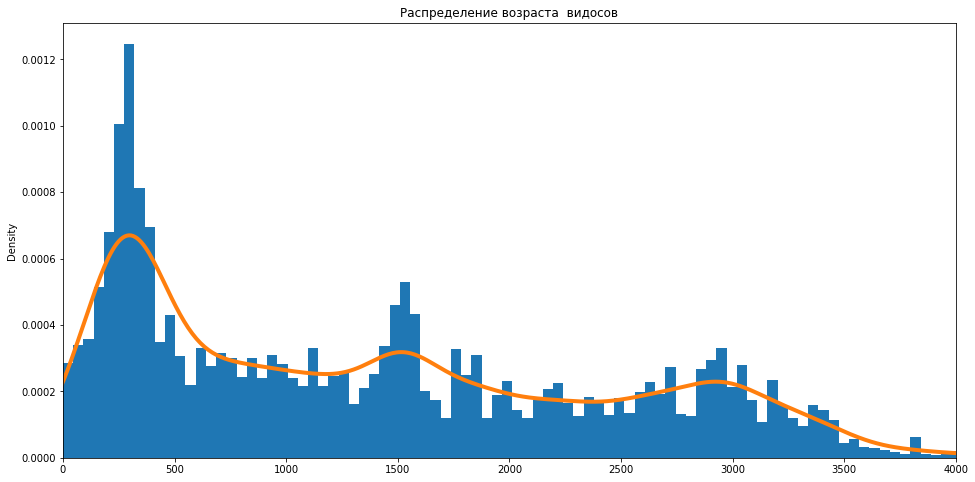

In [17]:
youtube['video_age'].hist(bins=100, density=True)
youtube['video_age'].plot(kind='kde', linewidth=4)
plt.xlim(0, 4000)
plt.title("Распределение возраста  видосов");

Можно посмотреть на основные описательные статистики получившегося распределения. 

In [19]:
youtube['video_age'].describe()

count    19124.000000
mean      1389.772642
std       1054.261698
min          0.000000
25%        378.000000
50%       1213.000000
75%       2218.000000
max       4574.000000
Name: video_age, dtype: float64

Давайте введём новую колонку `is_rap`. И запишем в неё $1$, если видео с рэпчиной. 

In [20]:
youtube['is_rap'] = 1*(youtube['music_style']  == 'rap')

Можно теперь построить две гистограмы. На одной будет возраст рэпчины, на второй возраст остальных видосов. 

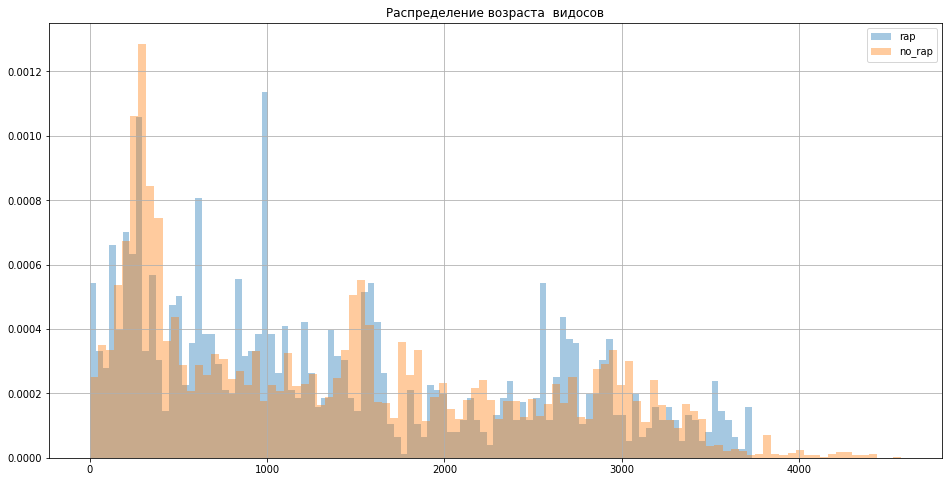

In [21]:
youtube['video_age'][youtube.is_rap == 1].hist(bins=100, alpha=0.4, label="rap", density=True)
youtube['video_age'][youtube.is_rap == 0].hist(bins=100, alpha=0.4, label="no_rap", density=True)

plt.legend()
plt.title("Распределение возраста  видосов");

Можно построить сразу много гистограмм! 

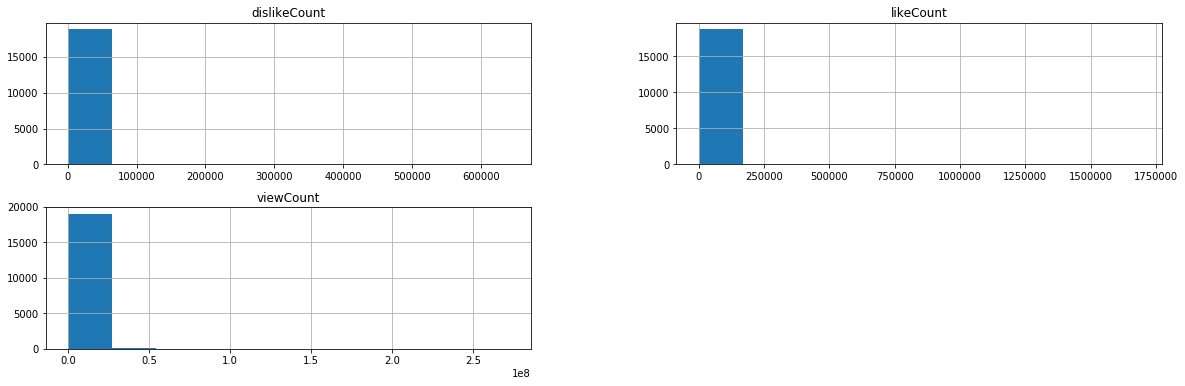

In [22]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
youtube[columns].hist(figsize=(20, 6));

Можно построить много гистограмм для логарифмов показателей. Тогда выбросы (помните? обсуждали на прошлой паре) сгладятся и будет чётче видно природу данных. 

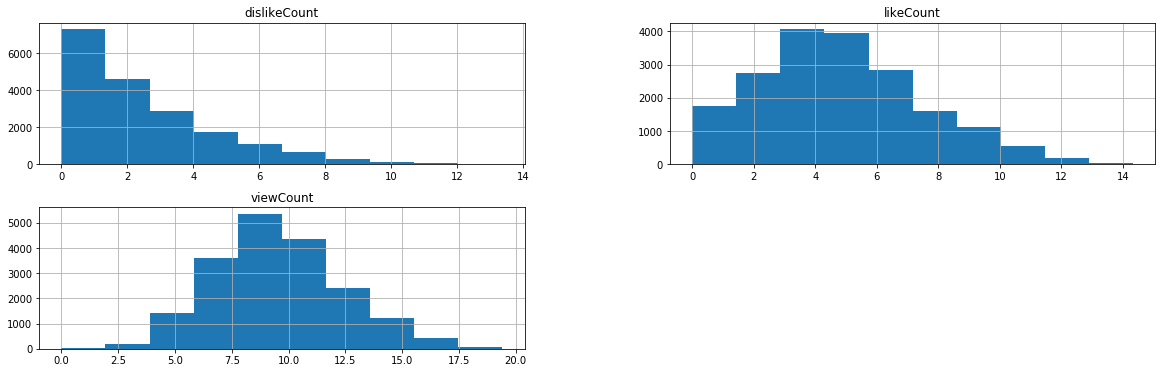

In [23]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
youtube[columns].apply(lambda x: np.log(x + 1)).hist(figsize=(20, 6));

## 2.2  Усатый ящик  и seaborn 

Многие картинки в matplotlib рисовать не очень удобно и приходится делать много циклов. На пример такого кода вы можете посмотреть в конце тетрадки. Для простоты был сделан специальный пакет для графики `seaborn`. В нём все картинки строятся в одну-две команды.

Давайте построим в seaborn boxplot.  Некоторые называют его "ящик с усиками". 

![](https://upload.wikimedia.org/wikipedia/commons/3/32/Densityvsbox.png)

Представляет из себя визуальное описание одномерной величины: отражает медиану, верхнюю и нижнюю квартиль, выбросы и минимальное и максимальное значения.

In [24]:
import seaborn as sns

In [25]:
df_log = youtube[columns].apply(lambda x: np.log(x + 1)) # снова прологарифмируем
df_log['music_style'] = youtube['music_style']
df_log.head()

,viewCount,likeCount,dislikeCount,music_style
0,12.275142,7.246368,3.784190,popsa
1,14.613657,9.262268,6.538140,popsa
2,10.604801,5.598422,2.397895,popsa
3,9.384966,5.099866,2.079442,popsa
4,11.423919,6.393591,2.995732,popsa


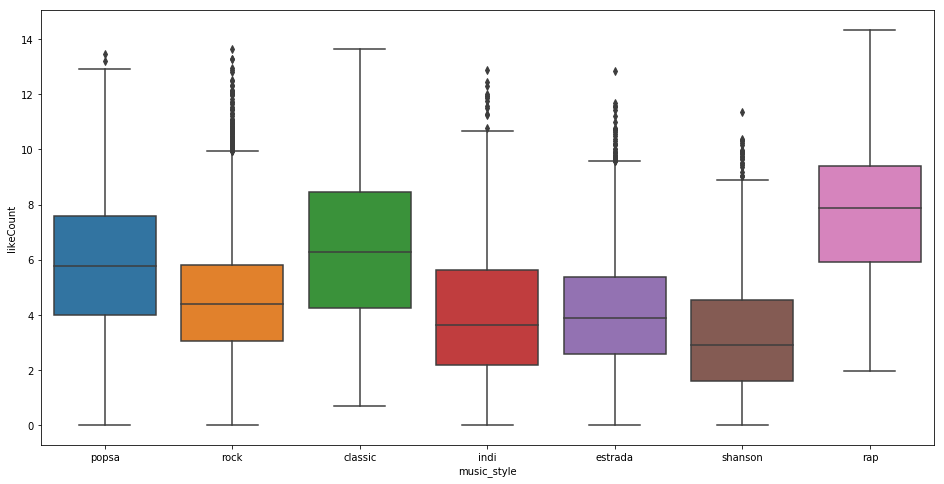

In [26]:
sns.boxplot(x='music_style', y='likeCount', data=df_log);

Можно построить похожую картинку под названием виалончель. Она отражает то же самое, что и ящики с усами, но выглядит более красиво. 

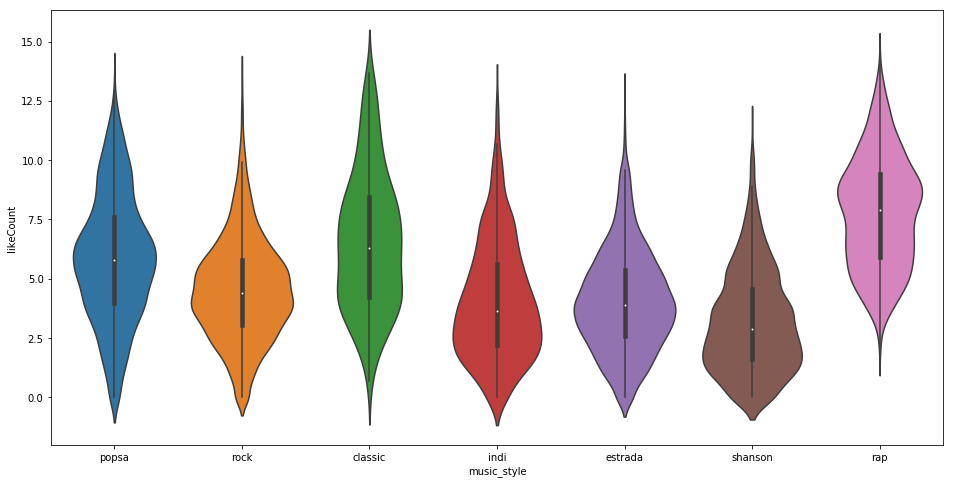

In [27]:
sns.violinplot(x='music_style', y='likeCount', data=df_log);

Теперь давайте немного поработаем со сложными картинками, которые состоят из кучи более маленьких картинок. Например, я хочу, чтобы слева сверху была гистограмма с лайками под рэпчиной. Справа снизу гистограмма с лайками под всем остальным. А на побочной диагонали виалончели и ящики с усами. 

In [28]:
df_log['is_rap'] = 1*(youtube['music_style']  == 'rap')

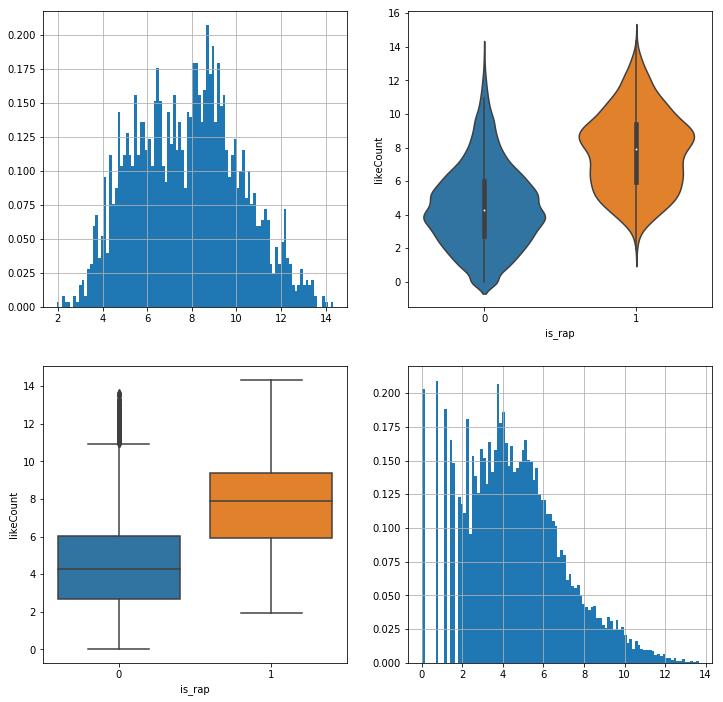

In [29]:
# Первая строчка говорит что я буду строить матрицу из картинок размера 2 x 2
_, axes = plt.subplots(2, 2, figsize=(12,12))

# дополнительной опцией ax = axes[i,j] я говорю где рисовать картинку! 
df_log['likeCount'][df_log.is_rap == 1].hist(bins=100, density=True, ax=axes[0, 0])
df_log['likeCount'][df_log.is_rap == 0].hist(bins=100, density=True, ax=axes[1, 1])

sns.boxplot(x='is_rap', y='likeCount', data=df_log, ax=axes[1, 0])
sns.violinplot(x='is_rap', y='likeCount', data=df_log, ax=axes[0, 1]);

## 2.3 Немного столбцовых диаграмм 

Давайте чуть детальнее посмотрим на возраст видосов и заведём новую колонку: сколько видосу лет.

In [30]:
def get_year(x):
    return datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ").year

youtube['year'] = youtube.publishedAt.map(get_year)

Построим стобиковую диаграмку для жанров, чтобы понять как они распределены. 

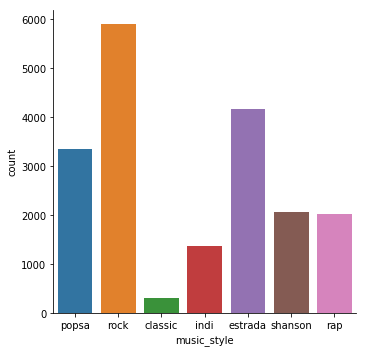

In [31]:
sns.catplot('music_style', data=youtube, kind='count')

Можно постэкать жанры между собой на одной картинке и посмотреть как их соотношение изменялось год от года.

In [32]:
df = youtube.pivot_table(index='year', columns='music_style', values='video_age', aggfunc='count')
df

music_style,classic,estrada,indi,popsa,rap,rock,shanson
year,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2007,NaN,10.0,NaN,14.0,NaN,37.0,2.0
2008,2.0,20.0,NaN,20.0,9.0,76.0,6.0
2009,3.0,169.0,2.0,45.0,77.0,131.0,22.0
2010,1.0,619.0,21.0,134.0,87.0,329.0,32.0
2011,8.0,277.0,19.0,155.0,194.0,738.0,176.0
2012,36.0,200.0,22.0,270.0,151.0,285.0,214.0
2013,36.0,259.0,15.0,222.0,101.0,388.0,229.0
2014,53.0,524.0,80.0,264.0,173.0,533.0,351.0


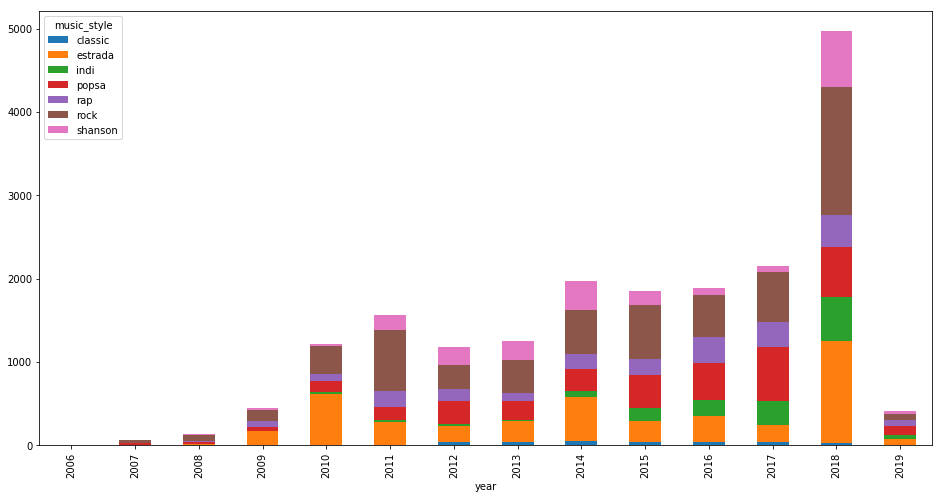

In [33]:
df.plot(kind='bar', stacked=True)

## 2.4 Scatterplot (облако рассеивания) 

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


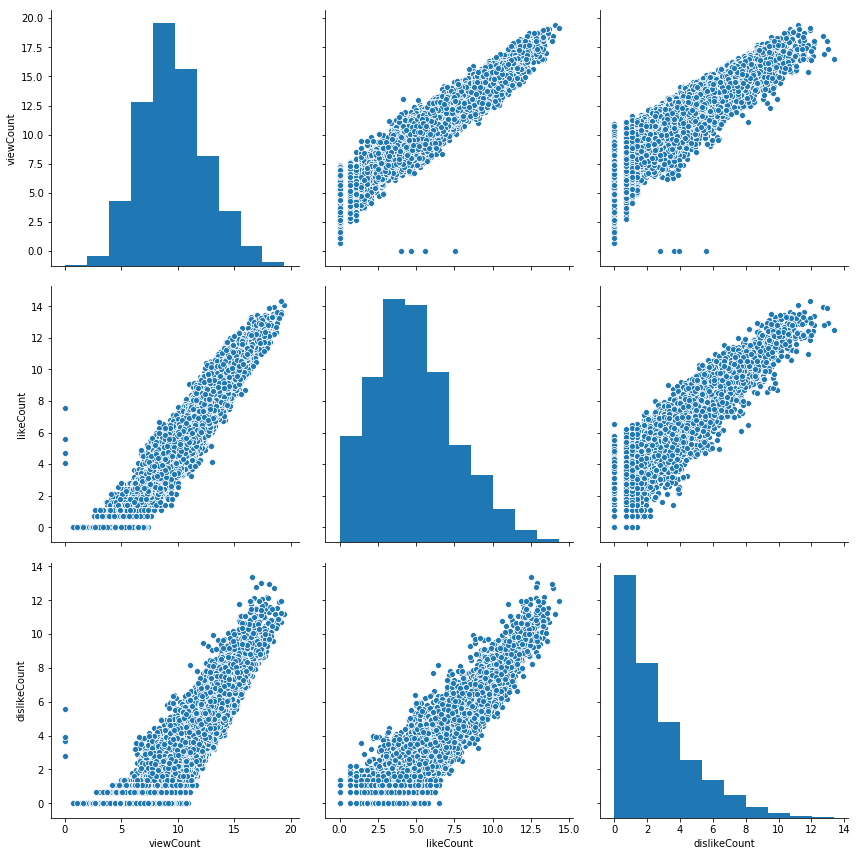

In [34]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
sns.pairplot(df_log[columns], height=4, aspect=1);

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


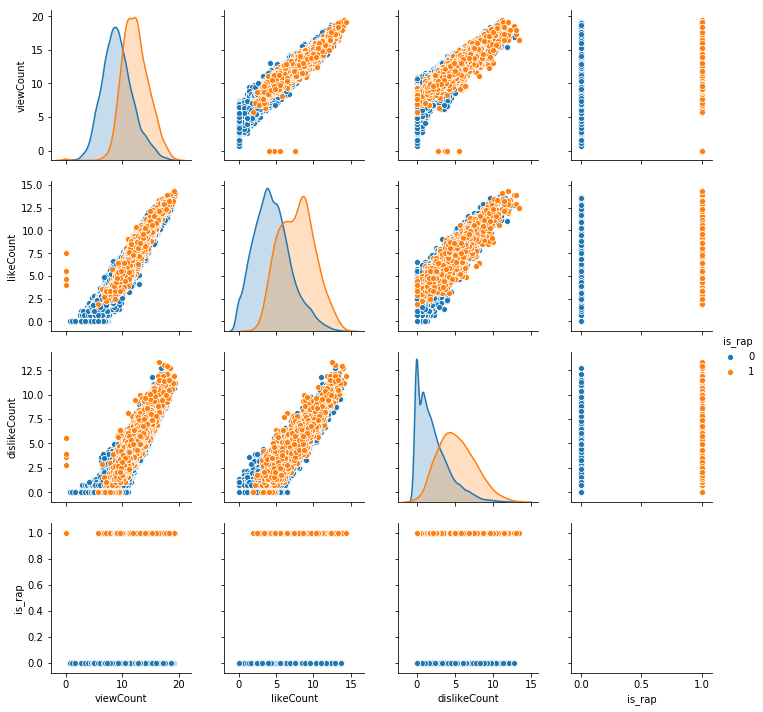

In [35]:
sns.pairplot(df_log, hue='is_rap');

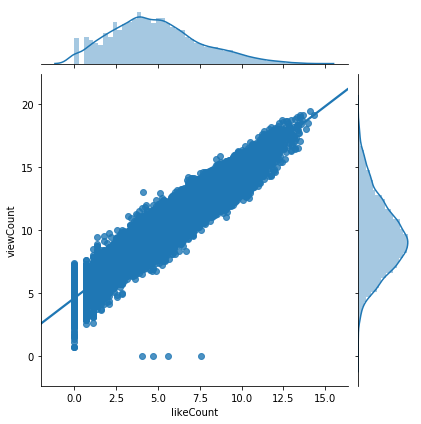

In [36]:
sns.jointplot(x="likeCount", y="viewCount", data=df_log, kind="reg");

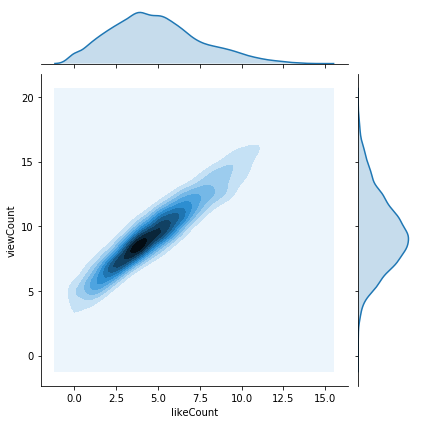

In [37]:
sns.jointplot(x="likeCount", y="viewCount", data=df_log, kind="kde");

## 2.5 Heatmap 

Можно посчитать между признаками корреляцию и построить картинку для неё :) 

Оставляем в табличке только числовые признаки. 

In [38]:
object_names = ['music_style', 'performer', 'publicStatsViewable', 'publishedAt', 'tags',
                'video_id', 'duration', 'license', 'licensedContent', 'duration', 'license',
                'definition', 'description', 'title', 'caption', 'year', 'is_rap', 'categoryId', 
                'publishedAt_ts']

df_numeric = youtube.drop(object_names, axis=1)

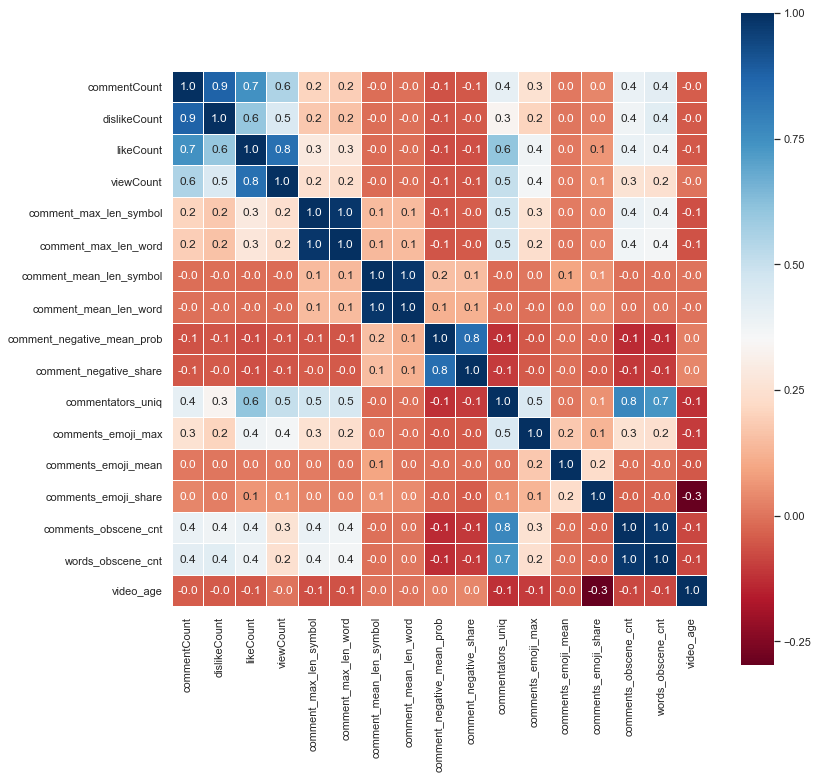

In [39]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(df_numeric.corr( ), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

## 3. Более сложные картинки

Некоторые картинки приходится строить по циклу. Давайте посмотрим как это делается, чтобы в будущем у нас не было с этим проблем. 

In [40]:
cat_features = ['definition', 'license', 'music_style']

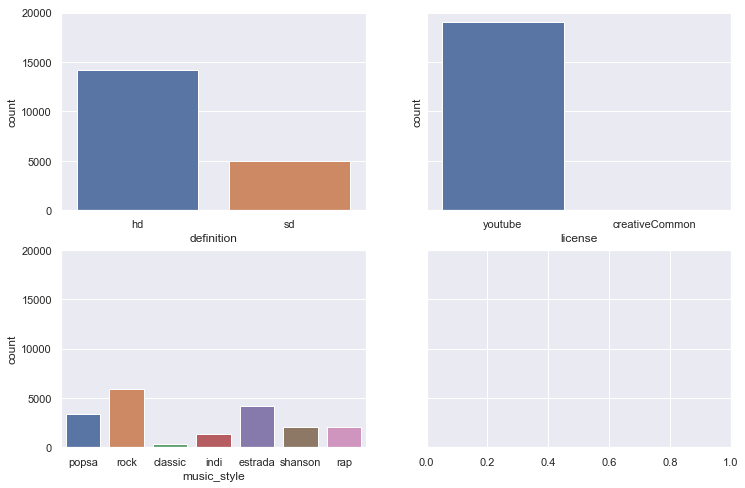

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

for i in range(len(cat_features)):
    sns.countplot(x=cat_features[i], data=youtube, ax=axes[i // 2, i % 2])

Ещё пример! Наносим каждую точку со своим цветом в зависимости от жанра. Размер точки - как часто жанр встречается! 

In [42]:
sizes = df_log.groupby('music_style').agg('count')['dislikeCount']
sizes

music_style
classic     297
estrada    3951
indi       1357
popsa      3331
rap        2023
rock       5835
shanson    2056
Name: dislikeCount, dtype: int64

In [43]:
sizes = sizes.to_dict()
sizes

{'classic': 297,
 'estrada': 3951,
 'indi': 1357,
 'popsa': 3331,
 'rap': 2023,
 'rock': 5835,
 'shanson': 2056}

In [44]:
# При желании можно импортировать цветовую схему:  http://seaborn.pydata.org/tutorial/color_palettes.html
colors = 'bgrcmyk'

colors = dict(zip(df_log.music_style.unique(), list(colors)))
colors

{'popsa': 'b',
 'rock': 'g',
 'classic': 'r',
 'indi': 'c',
 'estrada': 'm',
 'shanson': 'y',
 'rap': 'k'}

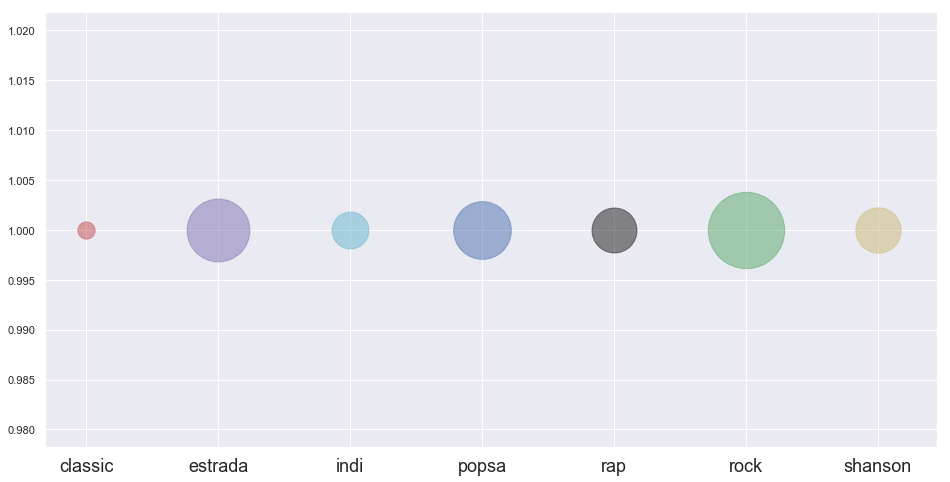

In [45]:
styles = list(sizes.keys())

for i,y in enumerate(styles):
    plt.scatter(i, 1, c=colors[y], alpha=0.5, label=str(y), s=sizes[y])
    
plt.xticks(ticks=list(range(len(styles))) , labels=styles, size=18);

### Хочу ещё графиков! 

Да пожалуйста! 

* Прочти статью на Хабре от ODS: https://habr.com/ru/company/ods/blog/323210/
* Загляни в галерею seaborn: http://seaborn.pydata.org/examples/index.html